# Import pandas and NumPy libraries.

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the tweet_engagements.csv file as pandas DataFrame.

In [6]:
tweets = pd.read_csv("tweet_engagements.csv")

# Explore the dataset using pandas functions.

In [7]:
tweets.head()

,Date,Impression,Engagement
0,1.11.2020,506,106
1,2.11.2020,331,50
2,3.11.2020,377,86
3,4.11.2020,333,108
4,5.11.2020,558,31


In [8]:
tweets.tail()

,Date,Impression,Engagement
117,26.04.2021,319,26
118,27.04.2021,397,119
119,28.04.2021,531,124
120,29.04.2021,150,28
121,30.04.2021,253,40


In [9]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        122 non-null    object
 1   Impression  122 non-null    int64 
 2   Engagement  122 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.0+ KB


In [10]:
tweets.describe()

,Impression,Engagement
count,122.000000,122.000000
mean,358.049180,53.860656
std,147.129552,37.894659
min,111.000000,7.000000
25%,228.000000,25.250000
50%,360.000000,44.000000
75%,478.750000,72.000000
max,619.000000,187.000000


In [11]:
tweets[tweets.duplicated() == True]

,Date,Impression,Engagement


In [12]:
for cn,c in tweets.iteritems():
    display(c.value_counts().nlargest(n = 5))

1.11.2020     1
31.03.2021    1
29.03.2021    1
28.03.2021    1
27.03.2021    1
Name: Date, dtype: int64

360    3
112    2
196    2
582    2
124    2
Name: Impression, dtype: int64

36    4
45    4
50    3
21    3
86    3
Name: Engagement, dtype: int64

In [13]:
for cn,c in tweets.iteritems():
    display(c.value_counts().nsmallest(n = 6))

1.11.2020     1
31.03.2021    1
29.03.2021    1
28.03.2021    1
27.03.2021    1
26.03.2021    1
Name: Date, dtype: int64

416    1
571    1
280    1
147    1
252    1
158    1
Name: Impression, dtype: int64

75     1
117    1
180    1
103    1
51     1
102    1
Name: Engagement, dtype: int64

In [14]:
tweets.nunique()

Date          122
Impression    111
Engagement     76
dtype: int64

In [15]:
for cn,c in tweets.iteritems():
    display(c.value_counts(normalize = True) * 100)

1.11.2020     0.819672
31.03.2021    0.819672
29.03.2021    0.819672
28.03.2021    0.819672
27.03.2021    0.819672
                ...   
7.12.2020     0.819672
6.12.2020     0.819672
5.12.2020     0.819672
4.12.2020     0.819672
30.04.2021    0.819672
Name: Date, Length: 122, dtype: float64

360    2.459016
112    1.639344
196    1.639344
582    1.639344
124    1.639344
         ...   
552    0.819672
227    0.819672
297    0.819672
465    0.819672
253    0.819672
Name: Impression, Length: 111, dtype: float64

36     3.278689
45     3.278689
50     2.459016
21     2.459016
86     2.459016
         ...   
112    0.819672
157    0.819672
42     0.819672
27     0.819672
124    0.819672
Name: Engagement, Length: 76, dtype: float64

# Transforming the Dataset

## Generate a DataFrame that contains week numbers in rows, week day names in columns, and engagement rates as values.

In [16]:
# Transform the Date column into a pandas date-time format
tweets["Date"] = pd.to_datetime(tweets["Date"])

In [17]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        122 non-null    datetime64[ns]
 1   Impression  122 non-null    int64         
 2   Engagement  122 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 3.0 KB


In [18]:
tweets.head()

,Date,Impression,Engagement
0,2020-01-11,506,106
1,2020-02-11,331,50
2,2020-03-11,377,86
3,2020-04-11,333,108
4,2020-05-11,558,31


In [19]:
# column that contains the names of the days of the week from Date.
tweets['week_day'] = tweets["Date"].dt.day_name()

In [20]:
# Create a week_number column that contains the week number of the year from Date. Consider Monday as the starting day of the week.
tweets['week_number'] = tweets['Date'].dt.isocalendar().week 

In [21]:
# Create a rate column that contains an engagement-per-impression rate.
tweets['rate'] = tweets['Engagement'] / tweets['Impression']

In [22]:
tweets.head()

,Date,Impression,Engagement,week_day,week_number,rate
0,2020-01-11,506,106,Saturday,2,0.209486
1,2020-02-11,331,50,Tuesday,7,0.151057
2,2020-03-11,377,86,Wednesday,11,0.228117
3,2020-04-11,333,108,Saturday,15,0.324324
4,2020-05-11,558,31,Monday,20,0.055556


In [23]:
# Generate a DataFrame that contains week numbers in rows, week day names in columns, and engagement rates as values.
engagement_df = tweets.pivot_table(index = "week_number", columns= "week_day", values= "rate")

In [24]:
engagement_df

week_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
week_number,,,,,,,
1,NaN,0.095628,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.209486,0.059102,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,0.200573,NaN,0.071240
7,NaN,NaN,NaN,NaN,NaN,0.151057,0.180905
9,NaN,NaN,NaN,NaN,0.181159,NaN,0.151786
10,NaN,NaN,0.143251,0.195335,NaN,NaN,NaN
11,0.060475,0.143275,0.041667,0.195777,0.083788,0.335196,0.203971
12,0.120275,0.040000,0.042857,0.126095,0.184211,0.325000,0.273810
13,NaN,0.119403,0.047619,0.035714,NaN,0.252404,0.115385


In [25]:
len(engagement_df)

35

In [26]:
# Drop the rows of the DataFrame that contain any NA value.
engagement_df = engagement_df.dropna(axis=0)

In [27]:
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 11 to 52
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Friday     7 non-null      float64
 1   Monday     7 non-null      float64
 2   Saturday   7 non-null      float64
 3   Sunday     7 non-null      float64
 4   Thursday   7 non-null      float64
 5   Tuesday    7 non-null      float64
 6   Wednesday  7 non-null      float64
dtypes: float64(7)
memory usage: 448.0+ bytes


In [25]:
engagement_df['Friday']

week_number
11    0.060475
12    0.120275
16    0.170530
47    0.190291
48    0.231526
51    0.072034
52    0.279359
Name: Friday, dtype: float64

# Calculating P-Values

The hypothesis we aim to test is that Friday is the best day to get maximum tweet engagement. In this milestone, our objective is to calculate the p-values between Friday and other-day tweet engagement rates and interpret the significance of the relationship.

In [74]:
# Write a function that takes two arrays as input arguments and returns a p-value of the permutation test.

def pvalue_permutation(array1, array2): 
    # To calculate the p-value of the permutation test, apply these in a function:
    # Calculate the means of the arrays and assign the absolute difference value of them to the extreme_mean_diff variable.
    extreme_mean_diff = abs(array1.mean() - array2.mean())
    print(f"There is a {extreme_mean_diff:.2f} tweet engagement difference between the two means.")
    
    # Stack two arrays column-wise into a single array.
    concatenated_array = np.hstack([array1, array2])
    
    # Shuffle the merged array and
    np.random.shuffle(concatenated_array)
    
    #  split it into two different arrays. 
    array1n, array2n = np.array_split(concatenated_array, 2)
    
    # Make the sample sizes the same as the initial arrays. 
    #assert array1n == len(array1)
    #assert array2n.size == len(array2)
    
    array1n = concatenated_array[:array1.size]
    array2n = concatenated_array[:array2.size]
    
    # Then calculate the means of these new arrays and their absolute difference value.
    mean_diff = abs(array1.mean() - array2.mean())
    print("Calculate the means of these new arrays and their absolute difference value.:", mean_diff)
    
    # Repeat the process in the previous step 30,000 times and count how many times the new calculated absolute difference value is greater than our initial extreme_mean_diff value.
    total_count = 0.0
    
    for _ in range(30000):
        
        # Stack two arrays column-wise into a single array.
        concatenated_array = np.hstack([array1, array2])
        
        #shuffle
        np.random.shuffle(concatenated_array)
        
        #split
        array1n, array2n = np.array_split(concatenated_array, 2)
        
        #make sample size the same
        assert array1n.size == len(array1)
        assert array2n.size == len(array2)
        
        # count how many times the new calculated absolute difference value is greater than our initial extreme_mean_diff value.
        if abs(array1n.mean() - array2n.mean()) >= extreme_mean_diff: # calculate means of new array and their abs. difference
            
            total_count += 1
    
    pvalue = total_count / 30000
    print(f"P-value is approximately {pvalue:.2f}")
    
    return pvalue # Return the “total count” / 30,000 as a p-value.

In [75]:
# Assign 0 to a NumPy random seed value.
np.random.seed(0)

In [76]:
# Create two new DataFrames: One contains only one column with engagement rates for Friday, and the other contains 6 columns with engagement rates for other days. Use the DataFrame generated in the previous milestone for this task.
df_Friday = engagement_df['Friday']
other_days_rates = engagement_df.drop(columns='Friday')
print(df_Friday.head(2))
print(other_days_rates.head(2))

week_number
11    0.060475
12    0.120275
Name: Friday, dtype: float64
week_day       Monday  Saturday    Sunday  Thursday   Tuesday  Wednesday
week_number                                                             
11           0.143275  0.041667  0.195777  0.083788  0.335196   0.203971
12           0.040000  0.042857  0.126095  0.184211  0.325000   0.273810


In [84]:
# Calculate the p-values between Friday and each other day using the permutation test function we created and store the p-values to a variable.
#Fridays = pvalue_permutation(Friday_df)

#Other_days = pvalue_permutation(Otherdays_df)


# You can use pandas dictionaries to store the p-values for days.
day_to_p_value = {}

for day, rate in other_days_rates.items(): # rate is a series
   
    p_value = pvalue_permutation(df_Friday.to_numpy(), rate.to_numpy())
    
    #day_to_p_value[day].append(p_value)
    day_to_p_value[str(day)] = p_value
    
    

There is a 0.01 cm difference between the two means.
Calculate the means of these new arrays and their absolute difference value.: 0.00846108965933895
P-value is approximately 0.84
There is a 0.06 cm difference between the two means.
Calculate the means of these new arrays and their absolute difference value.: 0.06325048690365369
P-value is approximately 0.14
There is a 0.06 cm difference between the two means.
Calculate the means of these new arrays and their absolute difference value.: 0.06037902664870491
P-value is approximately 0.13
There is a 0.03 cm difference between the two means.
Calculate the means of these new arrays and their absolute difference value.: 0.03487665110995161
P-value is approximately 0.35
There is a 0.10 cm difference between the two means.
Calculate the means of these new arrays and their absolute difference value.: 0.10324700257943836
P-value is approximately 0.07
There is a 0.01 cm difference between the two means.
Calculate the means of these new arrays an

In [85]:
day_to_p_value

{'Monday': 0.8363666666666667,
 'Saturday': 0.14053333333333334,
 'Sunday': 0.1317,
 'Thursday': 0.3514,
 'Tuesday': 0.06756666666666666,
 'Wednesday': 0.8271}

In [28]:
#full solution

def permutation_test(data_array_a, data_array_b):
    data_mean_a = data_array_a.mean()
    data_mean_b = data_array_b.mean()
    extreme_mean_diff = abs(data_mean_a - data_mean_b)
    total_data = np.hstack([data_array_a, data_array_b])
    number_extreme_values = 0.0
    for _ in range(30000):
        np.random.shuffle(total_data)
        sample_a = total_data[:data_array_a.size]
        sample_b = total_data[data_array_a.size:]
        if abs(sample_a.mean() - sample_b.mean())  >= extreme_mean_diff:
            number_extreme_values += 1

    p_value = number_extreme_values / 30000
    return p_value

np.random.seed(0)
friday_rates = engagement_df.Friday
other_days_rates = engagement_df.drop(columns='Friday')

day_to_p_value = {}
for day, rate in other_days_rates.items():
    p_value = permutation_test(friday_rates, rate)
    day_to_p_value[day] = p_value

# Interpreting the Results

In this milestone, you will reach a conclusion about the hypothesis by interpreting the results of the permutation test.

Workflow

1. Print out the p-values for each day along with the averages of the engagement rates.

2. Let’s assume the significance level is 0.05. Compare the average tweet engagement rate of Friday to that of other days, considering this p-value significance level.

3. Find out how we can apply Bonferroni correction in this case and apply it to obtain an adjusted significance level.

4. Interpret the p-values, but this time, use the adjusted significance level.

## 1

In [29]:
day_to_p_value

{'Monday': 0.8404,
 'Saturday': 0.13956666666666667,
 'Sunday': 0.13536666666666666,
 'Thursday': 0.3568,
 'Tuesday': 0.06626666666666667,
 'Wednesday': 0.8295333333333333}

In [39]:
other_days_rates.mean()

week_day
Monday       0.152180
Saturday     0.097391
Sunday       0.100262
Thursday     0.125765
Tuesday      0.263888
Wednesday    0.169922
dtype: float64

In [40]:
friday_rates.mean()

0.1606414917818364

In [52]:
for day, p_value in sorted(day_to_p_value.items(), key=lambda x: x[1]):
    if day in other_days_rates:
        mean = other_days_rates[day].mean()
        print(f"{day} has a p-value of {p_value} and a mean of {mean}")

Tuesday has a p-value of 0.06626666666666667 and a mean of 0.26388849436127476
Sunday has a p-value of 0.13536666666666666 and a mean of 0.10026246513313149
Saturday has a p-value of 0.13956666666666667 and a mean of 0.09739100487818271
Thursday has a p-value of 0.3568 and a mean of 0.1257648406718848
Wednesday has a p-value of 0.8295333333333333 and a mean of 0.16992228558710357
Monday has a p-value of 0.8404 and a mean of 0.15218040212249745


## 2.

If the p-value is less than the significance level, it means the null hypothesis is rejected.

In [31]:
# sort dictionary of days and p-values
sorted_days, sorted_p_values = zip(*sorted(day_to_p_value.items(),
                                             key=lambda x: x[1]))

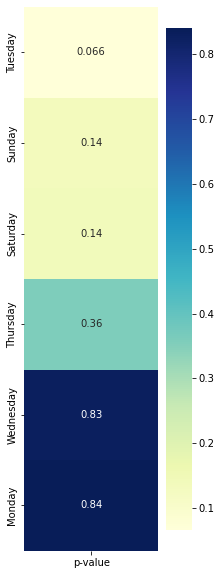

In [37]:
# heat map of p-values of other days
plt.figure(figsize=(3, 10))
sns.heatmap([[p_value] for p_value in sorted_p_values],
            cmap='YlGnBu', annot=True, xticklabels=['p-value'],
            yticklabels=sorted_days)
plt.show()

None of the other days vary significantly (at 0.05 CI) from Friday in tweet engagement.

## 3

We can divide our significance level by the counts of experiments to get an adjusted significance level. Experiment count, in this case, is the calculation count of the p-value.

In [54]:
num_planned_experiments = 30000
significance_level = .05 / num_planned_experiments
display(significance_level)

1.6666666666666667e-06

## 4

In [63]:
for day, p_value in day_to_p_value.items():
    if p_value <= significance_level:
        print("We found a statistically significant result.")
        print(f"The day was {day}")
        print(f"The p-value was {p_value}")
        break

# Solution Explanation

In [ ]:
*full solution*

```
friday_rates.mean()
for day, p_value in sorted(day_to_p_value.items(), key=lambda x: x[1]):
    if day in other_days_rates.columns:
        mean = other_days_rates[day].mean()
        print(f"{day} has a p-value of {p_value} and a mean of {mean}")

#Applying the Bonferonni correction
significance_level = 0.05 / 6
print(f"Adjusted significance level is {significance_level}")
for day, p_value in sorted(day_to_p_value.items(), key=lambda x: x[1]):
    if p_value < significance_level:
        mean = other_days_rates[day].mean()
        print(f"{day} has a p-value of {p_value} and a mean of {mean}")
```